In [ ]:
# 📌 Section 1: Install Required Packages
!pip install scikit-learn nltk pandas --quiet

In [ ]:
# 📌 Section 2: Import Libraries
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = {
    "text": [
        "Deep learning and convolutional networks have shown amazing results in computer vision tasks.",
        "Quantum entanglement and wave-particle duality are foundational principles in physics.",
        "Cell division and DNA replication are core topics in molecular biology.",
        "Differential equations and calculus are essential to mathematics.",
        "Transformers and BERT are recent advancements in natural language processing.",
        "The Higgs boson discovery confirmed theoretical predictions in particle physics.",
        "Protein folding prediction has advanced rapidly due to machine learning.",
        "Number theory and combinatorics are fascinating mathematical disciplines."
    ],
    "domain": [
        "Computer Science",
        "Physics",
        "Biology",
        "Mathematics",
        "Computer Science",
        "Physics",
        "Biology",
        "Mathematics"
    ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# 📌 Section 4: Text Preprocessing Function
stop_words = set(stopwords.words("english"))

In [ ]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z ]", "", text)
    tokens = nltk.word_tokenize(text.lower())
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["clean_text"] = df["text"].apply(preprocess_text)

In [ ]:
# 📌 Section 5: Train-Test Split
X = df["clean_text"]
y = df["domain"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 📌 Section 6: TF-IDF + Logistic Regression Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=200))])

In [ ]:
# 📌 Section 7: Evaluate Model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

 Mathematics       0.00      0.00      0.00       0.0
     Physics       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

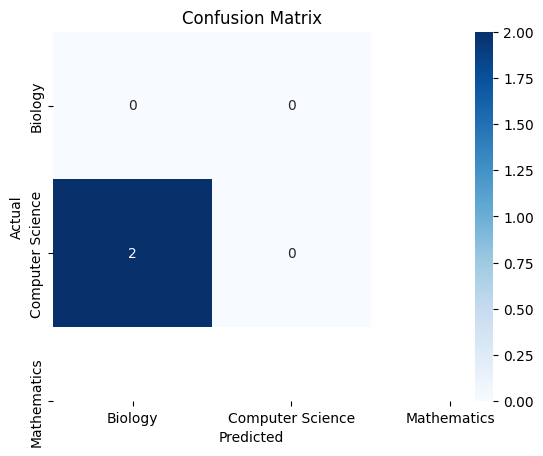

In [ ]:
# 📌 Section 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 📌 Section 9: Try a New Input
def predict_domain(text):
    cleaned = preprocess_text(text)
    return pipeline.predict([cleaned])[0]

In [ ]:
# Example
new_text = "Transformer models like GPT-3 revolutionized language understanding."
print("\nPredicted domain:", predict_domain(new_text))


Predicted domain: Computer Science
